## Experimenting with Qiskit

In [1]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [2]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

simulator = AerSimulator()

        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ Y ├─░─┤M├───
        ├───┤└───┘ ░ └╥┘┌─┐
   q_1: ┤ X ├──────░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
['10', '11', '11', '11', '10', '11', '10', '11', '11', '11', '10', '11', '11', '10', '11', '11', '11', '10', '11', '11', '10', '11', '10', '11', '10', '11', '11', '10', '11', '10', '11', '10', '10', '11', '10', '10', '11', '10', '10', '11', '10', '11', '11', '10', '11', '10', '10', '11', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '10', '11', '10', '11', '11', '11', '11', '11', '11', '11', '11', '10', '11', '10', '10', '10', '11', '10', '11', '10', '10', '11', '10', '11', '10', '10', '11', '11', '10', '11', '11', '11', '10', '10', '11', '10', '10', '10', '11', '10', '10', '10', '11', '11', '10', '11', '11', '11', '10', '10', '11', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '10', '11', '10', '11', '10', '11', '11', '11', '11', '11', '11', '11', '10', '10', '10',

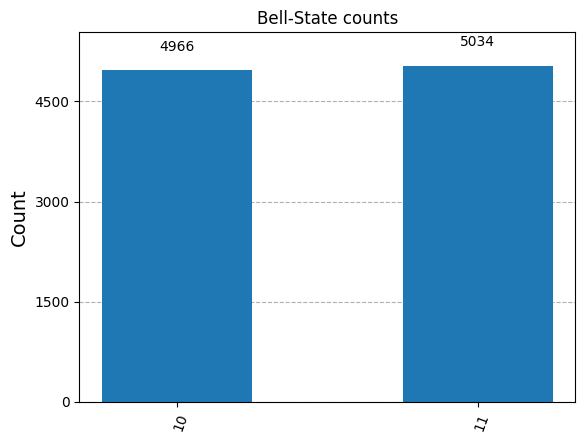

In [3]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.y(0)
circ.measure_all()

print(circ)

# Run and get counts
simulator = AerSimulator()
result = simulator.run(circ, shots=10000, memory=True).result()
memory = result.get_memory(circ)
counts = result.get_counts(circ)
print(memory)
plot_histogram(counts, title='Bell-State counts')

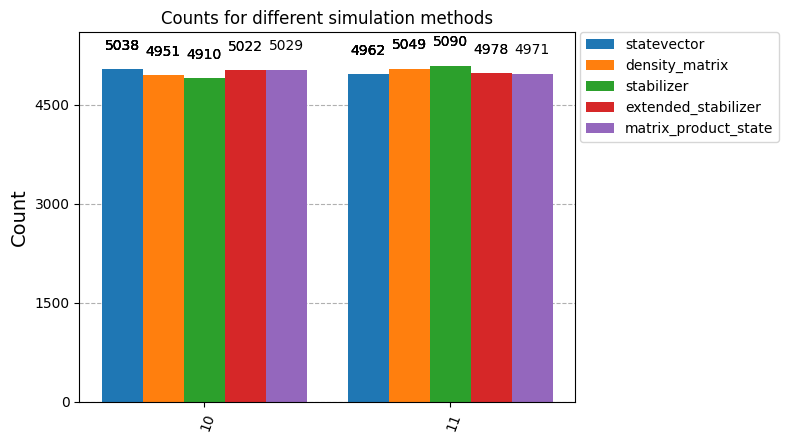

In [4]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

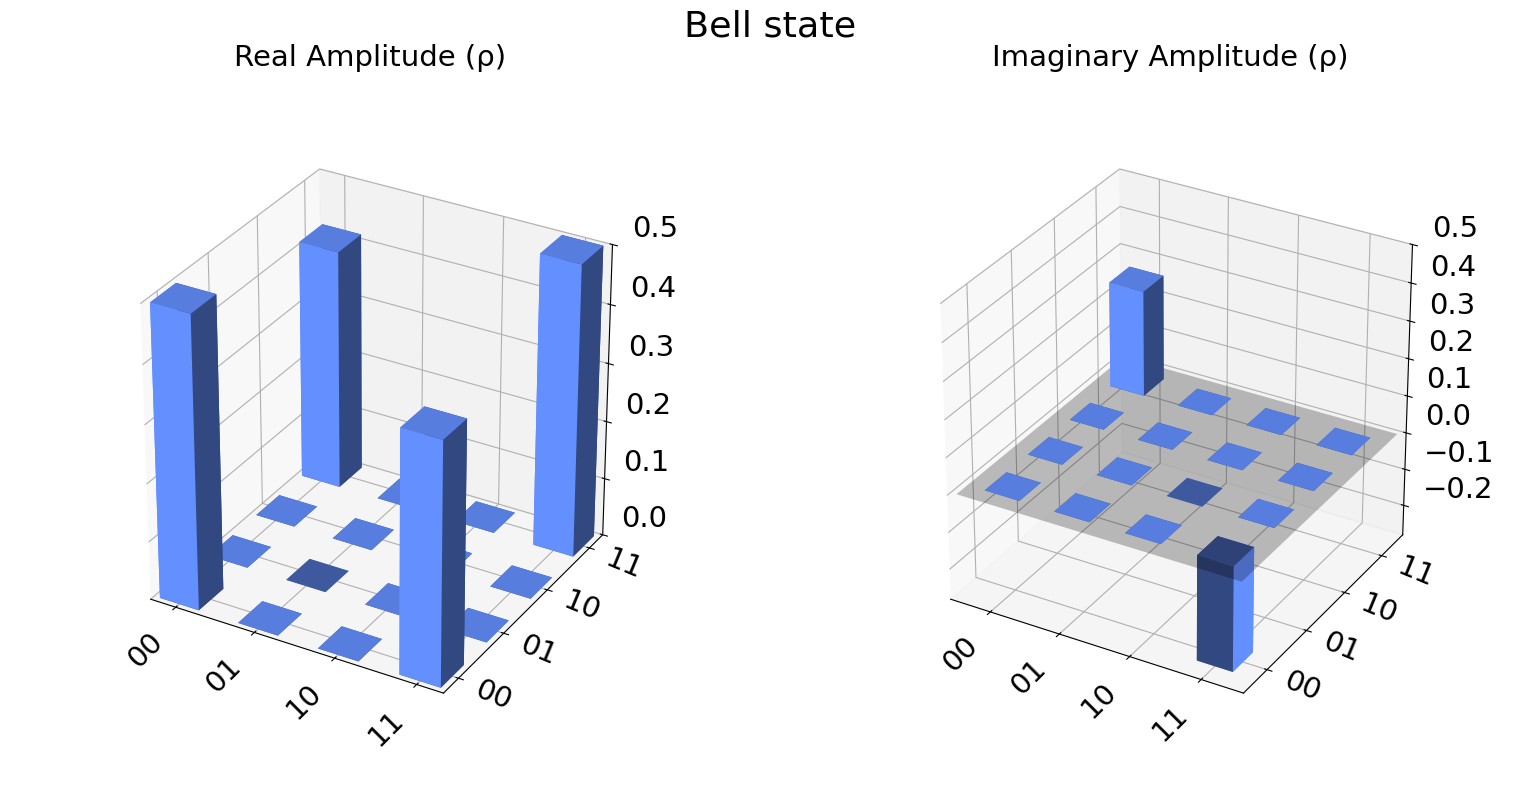

In [5]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.p(0.6, 0)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')